In [80]:
#
#SET THE KERNEL BEFORE STARTING! 
#


#kernel-> change kernel -> name of your ML4Science kernel


#Imports
import subprocess
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import copy 
import os
from os.path import join as pjoin

def mkdir_no_exist(d): os.makedirs(d, exist_ok=True)

from nilearn.plotting import plot_img, plot_glass_brain
import matplotlib.pyplot as plt


# repetition has to be known
TR = 0.72 

In [74]:
def pretty_print(files, n_toprint=None, basepath=False):
    to_print = files
    if n_toprint is not None:
        to_print = to_print[:n_toprint]
    for f in to_print:
        print(os.path.basename(f) if basepath else f)

# Try to load one fMRI file (files are saving as individual TRs .nii files)

Note that the data have already been preprocessed (removal of nuosance regressor, coregistration, normalization to mni)

In [39]:
HCP_dir = '/media/miplab-nas2/HCP-Data'
paradigm_dir = os.path.join(HCP_dir,'HCP_100unrelated_TaskParadigms')
fMRI_dir = os.path.join(HCP_dir,'HCP_100unrelated_preprocessed_ERG/data')
subjects_dir = './subjects/'

In [53]:
#Choose subject and task
subject='113619'
tasktype='MOTOR'

subject_task_prefix = f"{subject}_{tasktype}"

In [26]:
##List files in the directory and print them
PRINT_FILES=True
if(PRINT_FILES):
    files = os.listdir(paradigm_dir)
    for file in files:
        print(file)

100307_Regressor_tfMRI_SOCIAL_RL.mat
100408_Regressor_tfMRI_LANGUAGE_LR.mat
100408_Regressor_tfMRI_RELATIONAL_LR.mat
101309_Regressor_tfMRI_GAMBLING_RL.mat
101915_Regressor_tfMRI_EMOTION_RL.mat
103111_Regressor_tfMRI_EMOTION_LR.mat
103818_Regressor_tfMRI_WM_LR.mat
105014_Regressor_tfMRI_WM_LR.mat
111312_Regressor_tfMRI_SOCIAL_LR.mat
111312_Regressor_tfMRI_SOCIAL_RL.mat
115320_Regressor_tfMRI_LANGUAGE_LR.mat
115320_Regressor_tfMRI_MOTOR_LR.mat
116524_Regressor_tfMRI_EMOTION_LR.mat
120111_Regressor_tfMRI_EMOTION_RL.mat
120111_Regressor_tfMRI_SOCIAL_LR.mat
122317_Regressor_tfMRI_GAMBLING_LR.mat
122317_Regressor_tfMRI_WM_RL.mat
128127_Regressor_tfMRI_EMOTION_LR.mat
128127_Regressor_tfMRI_EMOTION_RL.mat
128127_Regressor_tfMRI_WM_LR.mat
128632_Regressor_tfMRI_LANGUAGE_LR.mat
130013_Regressor_tfMRI_EMOTION_LR.mat
130316_Regressor_tfMRI_EMOTION_RL.mat
133019_Regressor_tfMRI_GAMBLING_LR.mat
136833_Regressor_tfMRI_GAMBLING_RL.mat
136833_Regressor_tfMRI_SOCIAL_LR.mat
147737_Regressor_tfMRI_EMOTIO

In [30]:
#Files are inside the subject firectory and they 
filename_one_tr=os.path.join(fMRI_dir,subject,'tfMRI_'+tasktype+'_RL/fMRIvols_GLMyes/Cov_ftfMRI_'+tasktype+'_RL0190.nii')
print(filename_one_tr)

nibfile = nib.load(filename_one_tr)
tmp = nibfile.get_fdata()
affine = nibfile.affine

#plt.plot(tmp[30,:,:])

/media/miplab-nas2/HCP-Data/HCP_100unrelated_preprocessed_ERG/data/113619/tfMRI_MOTOR_RL/fMRIvols_GLMyes/Cov_ftfMRI_MOTOR_RL0190.nii


# Create a 4D nifti file stacking the individual TRs

In [75]:
import glob
from nilearn import image

nii_directory = os.path.join(fMRI_dir,subject,'tfMRI_'+tasktype+'_RL/fMRIvols_GLMyes/')
nii_files = sorted(glob.glob(nii_directory + '*.nii'))  # Get all .nii files

pretty_print(nii_files, n_toprint=10)

# Load the first NIfTI file to get the header and affine which are shared across TRs
first_img = nib.load(nii_files[0])
data = first_img.get_fdata()  # 3D data from the first file

# Create an empty array to hold the 4D data
data_4d = np.zeros((data.shape[0], data.shape[1], data.shape[2], len(nii_files)))

# Load each .nii file and fill the 4D array
for i, nii_file in enumerate(nii_files):
    
    #Print to Check the timing of the slices if correct 
    #print(nii_file)
    
    img = nib.load(nii_file)
    
    #----------Applying smoothing!!!!!!!!!!!!!!!!!!! the second argument is the mm----------------
    img = image.smooth_img(img, 5)

    data_4d[..., i] = img.get_fdata()  # Fill the 4th dimension

# Create a new NIfTI image
new_img = nib.Nifti1Image(data_4d, affine=first_img.affine, header=first_img.header)

# Save the 4D image as .nii.gz
filename=subject+'_tfMRI_'+tasktype+'_RL_fMRIvols_GLMyes_4D_image.nii.gz'

#Example temporary saving path
saving_path='/home/federico/CS-433-ML4S/data/'+filename
#saving_path='/Users/flhi1/Documents/PhD/code/ML4SCIENCE/'+filename
#saving_path='/data/PhD/code/ML4SCIENCE/'+filename

nib.save(new_img, saving_path)

#Check dimensions
print(data_4d.shape) #last is time

/media/miplab-nas2/HCP-Data/HCP_100unrelated_preprocessed_ERG/data/113619/tfMRI_MOTOR_RL/fMRIvols_GLMyes/Cov_ftfMRI_MOTOR_RL0001.nii
/media/miplab-nas2/HCP-Data/HCP_100unrelated_preprocessed_ERG/data/113619/tfMRI_MOTOR_RL/fMRIvols_GLMyes/Cov_ftfMRI_MOTOR_RL0002.nii
/media/miplab-nas2/HCP-Data/HCP_100unrelated_preprocessed_ERG/data/113619/tfMRI_MOTOR_RL/fMRIvols_GLMyes/Cov_ftfMRI_MOTOR_RL0003.nii
/media/miplab-nas2/HCP-Data/HCP_100unrelated_preprocessed_ERG/data/113619/tfMRI_MOTOR_RL/fMRIvols_GLMyes/Cov_ftfMRI_MOTOR_RL0004.nii
/media/miplab-nas2/HCP-Data/HCP_100unrelated_preprocessed_ERG/data/113619/tfMRI_MOTOR_RL/fMRIvols_GLMyes/Cov_ftfMRI_MOTOR_RL0005.nii
/media/miplab-nas2/HCP-Data/HCP_100unrelated_preprocessed_ERG/data/113619/tfMRI_MOTOR_RL/fMRIvols_GLMyes/Cov_ftfMRI_MOTOR_RL0006.nii
/media/miplab-nas2/HCP-Data/HCP_100unrelated_preprocessed_ERG/data/113619/tfMRI_MOTOR_RL/fMRIvols_GLMyes/Cov_ftfMRI_MOTOR_RL0007.nii
/media/miplab-nas2/HCP-Data/HCP_100unrelated_preprocessed_ERG/data/11

In [7]:
# Try with different FWHM smoothing
# from nilearn import image
# 
# print(first_img)
# #tHIS IS AN EXAMPLE OF SMOOTHING ON ONE TIME POINT, 
# for smoothing in range(0, 25, 5):
#     smoothed_img = image.smooth_img(first_img, smoothing)
#     plotting.plot_epi(smoothed_img, title=f"Smoothing {int(smoothing)}mm")
# 
# plotting.show()

In [8]:
#Plot the last TR
# plotting.plot_epi(img, title=f"Smoothing {int(smoothing)}mm")
# plotting.show()

In [9]:
#If you only want to load a previously generated 4d file

#fMRI_img_path='/home/fpetruso/tmp_ml4science/4d_image.nii.gz'
#fourd_data = nib.load(fMRI_img_path)
#fourd_data.shape

# Plot the corresponding regressor 


(1, 284)


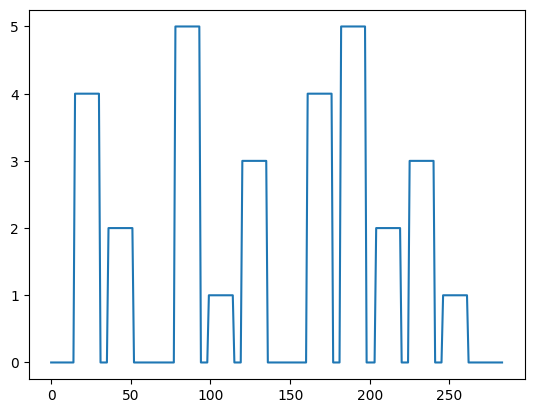

In [34]:
import scipy.io

# Load the .mat file
filepath=os.path.join(paradigm_dir,str(subject)+'_Regressor_tfMRI_'+tasktype+'_RL.mat')
data = scipy.io.loadmat(filepath)

print(data['Regressor'].shape)
regressor=data['Regressor']

# Flatten the regressor to 1D if necessary
regressor_flat = regressor.flatten()
regressor_flat
plt.plot(regressor_flat)

#check that dimensions match
assert data_4d.shape[3] == regressor_flat.shape[0] 

In [11]:
##TODO look better into the other regressors

In [12]:
# Initialize lists to store onset, duration, and condition (trial type)
onsets, durations, trial_types = [], [], []

# Identify events by iterating through the regressor
current_condition = regressor_flat[0]
start_time = 0  # Initial start time

for i, condition in enumerate(regressor_flat[1:], start=1):
    
    if condition != current_condition:
        
        # Append the onset, duration, and trial type of the previous condition
        onsets.append(start_time * TR)
        durations.append((i - start_time) * TR)
        trial_types.append(f'condition_{current_condition}')
        
        # Update for the new condition
        current_condition = condition
        start_time = i

# Add the last event
onsets.append(start_time * TR)
durations.append((len(regressor_flat) - start_time) * TR)
trial_types.append(f'condition_{current_condition}')

# Create the event file as a DataFrame
events = pd.DataFrame({
    'onset': onsets,
    'duration': durations,
    'trial_type': trial_types
})

#Remove condition 0 which is a the no-paradigm condition and reset indexes
events=events[events['trial_type']!="condition_0"]
events = events.reset_index(drop=True)
events

,onset,duration,trial_type
0,10.80,11.52,condition_4
1,25.92,11.52,condition_2
2,56.16,11.52,condition_5
3,71.28,11.52,condition_1
4,86.40,11.52,condition_3
5,115.92,11.52,condition_4
6,131.04,11.52,condition_5
7,146.88,11.52,condition_2
8,162.00,11.52,condition_3
9,177.12,11.52,condition_1


## More flexible GLM structure - I assign each condition acivation to a column

In [142]:
# Create a new trial_type column where each event occurrence has a unique identifier
condition_counts = events['trial_type'].value_counts().to_dict()

independent_events = copy.deepcopy(events)

# Modify the trial_type to include the index of each event occurrence
independent_events['trial_type'] = [f"{row['trial_type']}_{i}" for i, row in events.iterrows()]

independent_events

,onset,duration,trial_type
0,10.80,11.52,condition_4_0
1,25.92,11.52,condition_2_1
2,56.16,11.52,condition_5_2
3,71.28,11.52,condition_1_3
4,86.40,11.52,condition_3_4
5,115.92,11.52,condition_4_5
6,131.04,11.52,condition_5_6
7,146.88,11.52,condition_2_7
8,162.00,11.52,condition_3_8
9,177.12,11.52,condition_1_9


-----
-----

# Using the custom, subject-defined gray matter mask

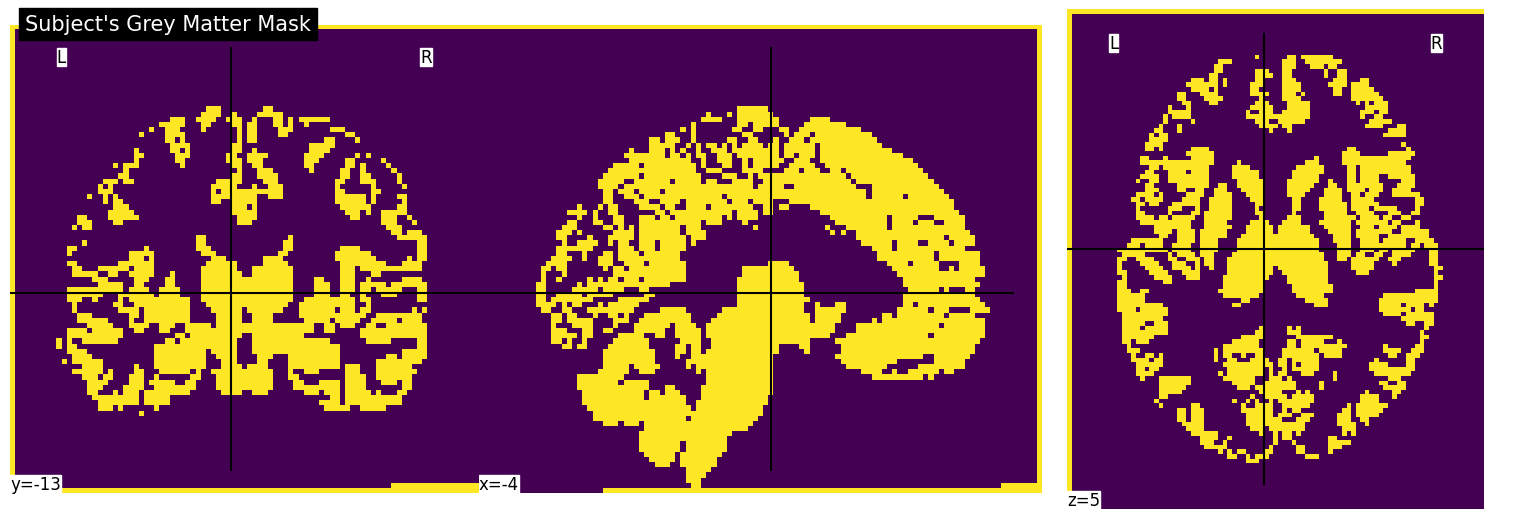

In [38]:
from nilearn.plotting import plot_img
import matplotlib.pyplot as plt
from scipy import ndimage

grey_matter_mask = os.path.join(fMRI_dir,subject,'T1/Atlased/GMmask.nii')

# Plot the resampled gray matter mask
plot_img(grey_matter_mask, title="Subject's Grey Matter Mask", figure=plt.figure(figsize=(15, 5)))

# Show the plot
plt.show()

There are some margins that are clearly an error of preprocessing... I manually remove them

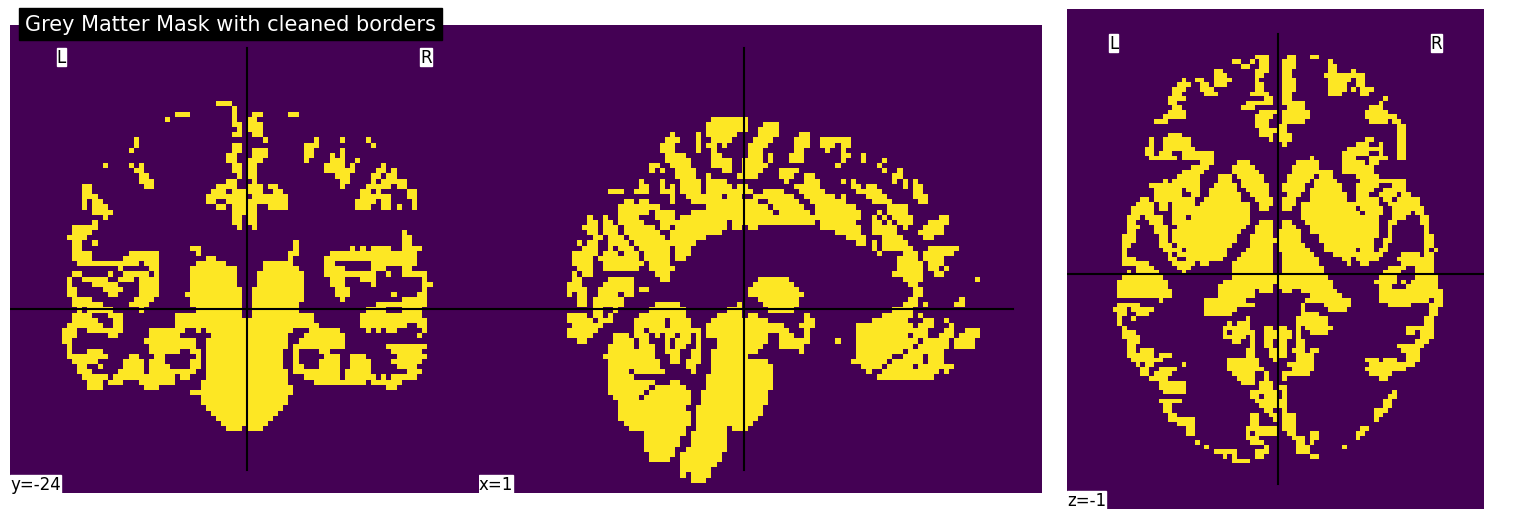

In [45]:
# Load the NIfTI file

nifti_image = nib.load(grey_matter_mask)
mask_data = nifti_image.get_fdata()

border_size = 2

mask_data[:border_size, :, :] = 0  # Remove borders along the first dimension (x)
mask_data[-border_size:, :, :] = 0
mask_data[:, :border_size, :] = 0  # Remove borders along the second dimension (y)
mask_data[:, -border_size:, :] = 0
mask_data[:, :, :border_size] = 0  # Remove borders along the third dimension (z)
mask_data[:, :, -border_size:] = 0

clean_gm_mask = nib.Nifti1Image(mask_data, affine=nifti_image.affine, header=nifti_image.header)

# Plot the resampled gray matter mask
plot_img(clean_gm_mask, title="Grey Matter Mask with cleaned borders", figure=plt.figure(figsize=(15, 5)))

In [46]:
# Saving it to plot it in mricron or similar visualization softwares (e.g. fsl) to visually check that all artifacts ahve been removed

# Save the 4D image as .nii.gz
filename = os.path.join(subjects_dir, subject+'_gray_matter.nii.gz')
#saving_path='/home/fpetruso/tmp_ml4science/'+filename
#saving_path='/Users/flhi1/Documents/PhD/code/ML4SCIENCE/'+filename
#saving_path='/data/PhD/code/ML4SCIENCE/'+filename

print(filename)

./subjects/113619_gray_matter.nii.gz


In [47]:
nib.save(clean_gm_mask, filename)

## I fit the GLM with the grey matter mask

In [56]:
import nilearn
from nilearn.glm import threshold_stats_img
from nilearn.glm.first_level import make_first_level_design_matrix, FirstLevelModel
from nilearn.plotting import plot_design_matrix
# Specify what sort of GLM we want (nature of the noise, repetition time of the data and other parameters)

#Run the GLM with the mask
fmri_glm = FirstLevelModel(mask_img=clean_gm_mask, # !!! Grey matter mask added-----
                           t_r=TR,
                           noise_model='ar1', #or ols 
                           standardize=False,
                           hrf_model='spm',
                           drift_model=None) #Not necessary, nuisance covariates have already been removed

# Fit the model to our design and data
fmri_glm = fmri_glm.fit(new_img, independent_events) #Use "events" for the other design

In [50]:
#The warning should be okay as it is just telling me that the data are centered 

## Plot the design matrix

<AxesSubplot:label='conditions', ylabel='scan number'>

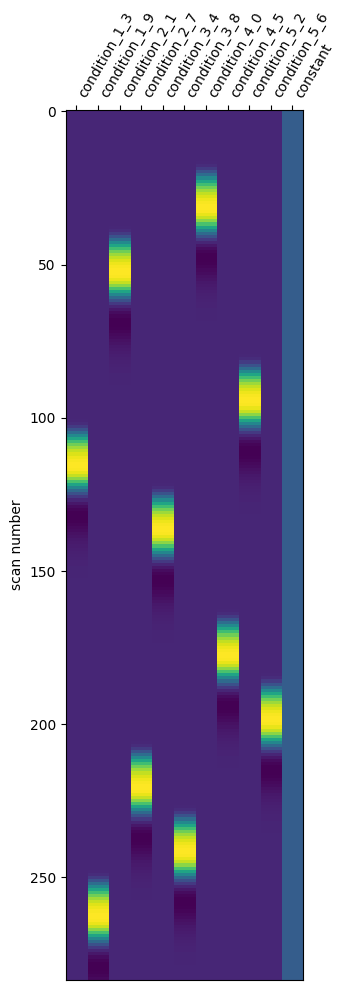

In [79]:
design_matrix = fmri_glm.design_matrices_[0]
plot_design_matrix(design_matrix)

## Create appropriate contrast vector for the F-statistics

In [52]:
from nilearn.plotting import plot_contrast_matrix
from nilearn import plotting

n_regressors = design_matrix.shape[1] #non usato per ora

contrast_matrix = np.diag(np.ones(n_regressors)) 
contrast_matrix[n_regressors-1,n_regressors-1]=0 

contrast_matrix = np.zeros((n_regressors-1, n_regressors))
np.fill_diagonal(contrast_matrix, 1)  # Identity matrix for joint F-test

print(contrast_matrix)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


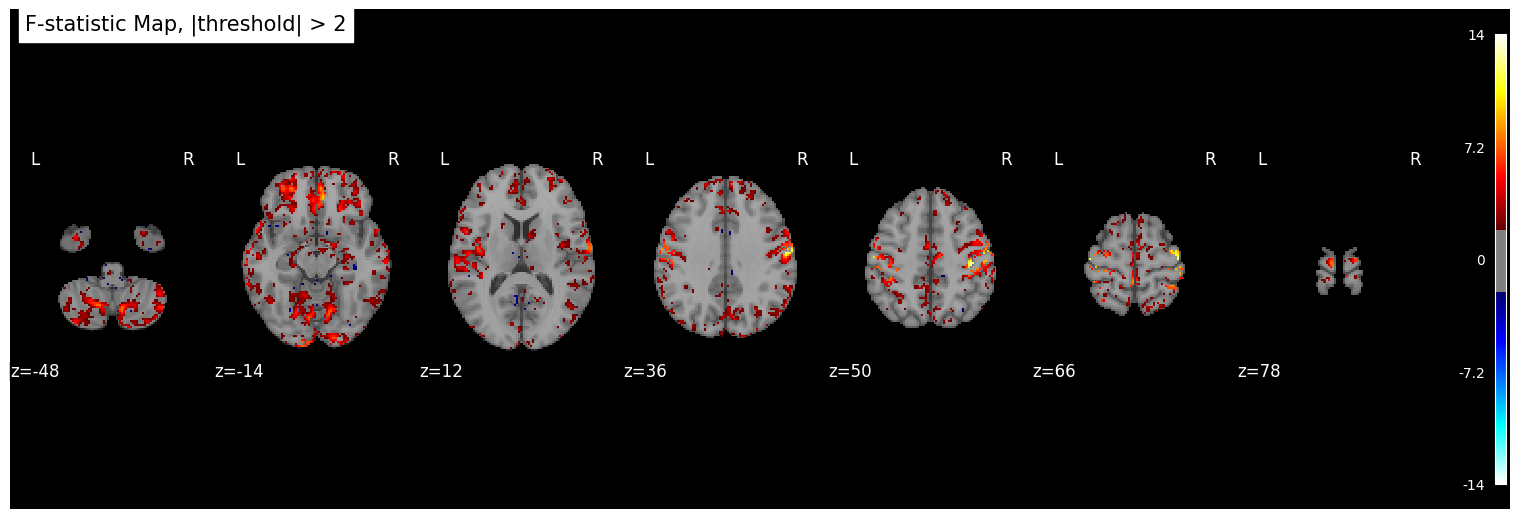

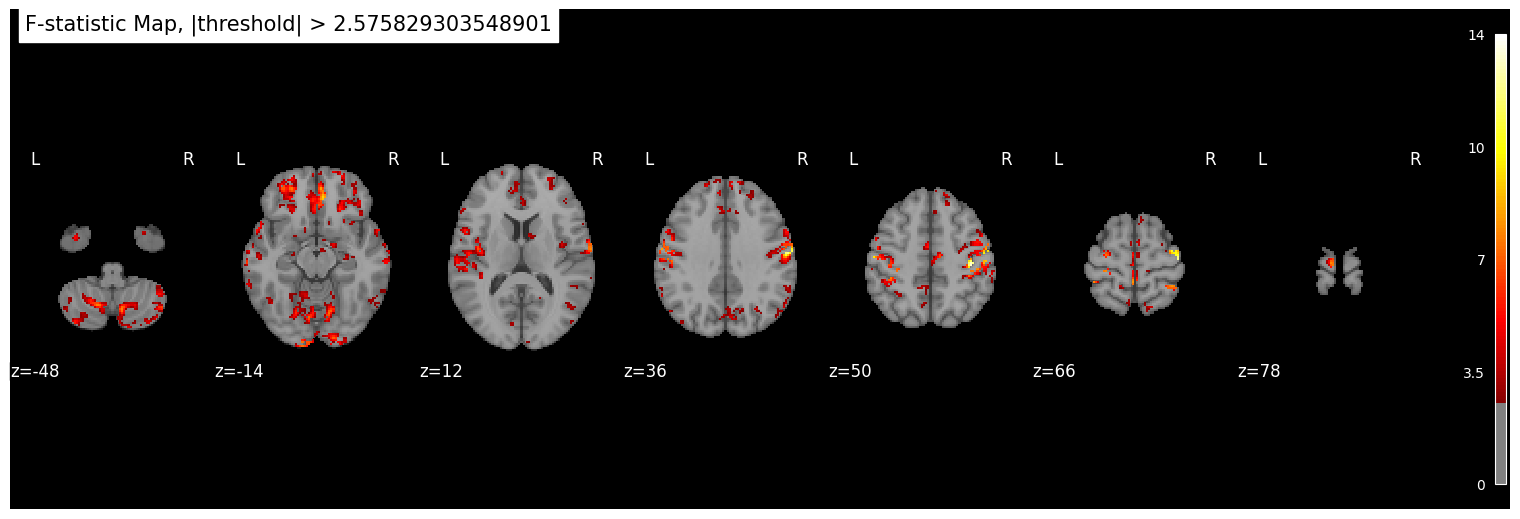

In [69]:
# Compute the contrast for an F-test and save the map to a file if needed
f_test_result = fmri_glm.compute_contrast(contrast_matrix, stat_type='F')
f_test_result.to_filename(f"{subject_task_prefix}_f_stat_map.nii.gz")  

cluster_size = 10
fdr_rate = 0.01

cluster_f_map, fmap_th = threshold_stats_img(
    f_test_result, 
    alpha=fdr_rate, 
    cluster_threshold=cluster_size,
)

plotting_config = {
    "display_mode": "ortho",  # "ortho" for three orthogonal slices
    #"cut_coords": (45, 60, 50), 
    "display_mode": "z",
    "black_bg": True,
    "cut_coords": 7,
}
plotting.plot_stat_map(
    f_test_result,
    threshold=2,
    title=f"F-statistic Map, |threshold| > {2}",
    figure=plt.figure(figsize=(15, 5)),
    **plotting_config,
)
plotting.plot_stat_map(
    cluster_f_map,
    threshold=fmap_th,
    title=f"F-statistic Map, |threshold| > {fmap_th}",
    figure=plt.figure(figsize=(15, 5)),
    **plotting_config,
)
plt.show()

#Reason about selecting the threshold 

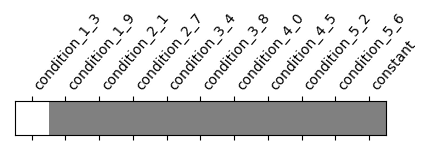

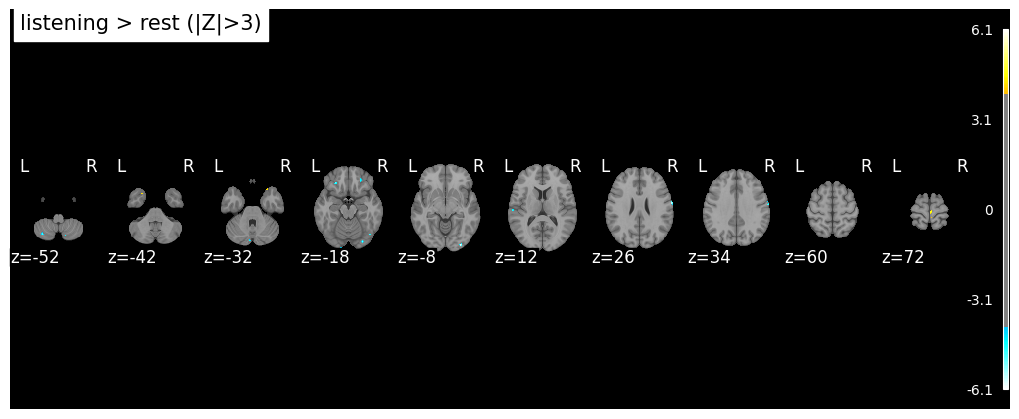

In [59]:
#Extra - trying individual regressors

from nilearn.plotting import plot_anat, plot_img, plot_stat_map, show, plot_contrast_matrix
n_regressors = design_matrix.shape[1] #non usato per ora

contrast_vector = np.zeros(n_regressors)
contrast_vector[-1]=0
contrast_vector[0]=1

plot_contrast_matrix(contrast_def=contrast_vector, design_matrix=design_matrix)
z_map = fmri_glm.compute_contrast(contrast_vector, output_type="z_score") #contrast_vector

plotting_config = {
    #"bg_img": mean_img,
    "display_mode": "z",
    "cut_coords": 10,
    "black_bg": True,
}
plot_stat_map(
    z_map,
    threshold=4,
    title="listening > rest (|Z|>3)",
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()

In [284]:
###The idea is to select a certaim percentage of voxels based on their values on the F-maps (or other maps)

# Task selection



In [82]:
HCP_dir = '/media/miplab-nas2/HCP-Data'
paradigm_dir = pjoin(HCP_dir,'HCP_100unrelated_TaskParadigms')
fMRI_dir = pjoin(HCP_dir,'HCP_100unrelated_preprocessed_ERG/data')

project_dir = '/media/RCPNAS/Data2/CS-433-ML4S/'
project_data_dir = pjoin(project_dir, 'data')
derivatives_dir = pjoin(project_data_dir, 'derivatives')

anat_dir = pjoin(derivatives_dir, 'anat')
func_dir = pjoin(derivatives_dir, 'func')

mkdir_no_exist(anat_dir)
mkdir_no_exist(func_dir)

In [113]:
subject = '113619'
tasktype = 'MOTOR'
acquisition = "RL"

subject_task_prefix = f"{subject}_{tasktype}"

In [146]:
def subject_gm_mask_path(subject):
    return pjoin(anat_dir, f"{subject}_gm_mask.nii.gz")

def subject_task_concat_volumes_path(subject, task, aquisition, smoothing):
    return pjoin(func_dir, f"{subject}_{task}_{aquisition}_smooth-{smoothing}mm_fMRIvols.nii.gz")

def subject_task_fmap(subject, task, aquisition, smoothing):
    return pjoin(func_dir, f"{subject}_{task}_{aquisition}_smooth-{smoothing}mm_fmap.nii.gz")

In [106]:
def process_gray_matter_mask(anat_dir, subject, border_size=10, save=False):
    grey_matter_mask = pjoin(fMRI_dir, subject, 'T1/Atlased/GMmask.nii')

    # Plot the resampled gray matter mask
    plot_img(grey_matter_mask, title="Subject's Grey Matter Mask", cut_coords=[-5, -20, 5], figure=plt.figure(figsize=(15, 4)))

    nifti_image = nib.load(grey_matter_mask)
    mask_data = nifti_image.get_fdata()

    mask_data[:border_size, :, :] = 0  # Remove borders along the first dimension (x)
    mask_data[-border_size:, :, :] = 0
    mask_data[:, :border_size, :] = 0  # Remove borders along the second dimension (y)
    mask_data[:, -border_size:, :] = 0
    mask_data[:, :, :border_size] = 0  # Remove borders along the third dimension (z)
    mask_data[:, :, -border_size:] = 0

    clean_gm_mask = nib.Nifti1Image(mask_data, affine=nifti_image.affine, header=nifti_image.header)

    # Plot the resampled gray matter mask
    plot_img(clean_gm_mask, title="Grey Matter Mask with cleaned borders", cut_coords=[-5, -20, 5], figure=plt.figure(figsize=(15, 4)))
    
    # Show the plot
    plt.show()

    # Save the 4D image as .nii.gz
    clean_gm_mask_file = subject_gm_mask_path(subject)
    print(clean_gm_mask_file)
    
    if save:
        nib.save(clean_gm_mask, clean_gm_mask_file)

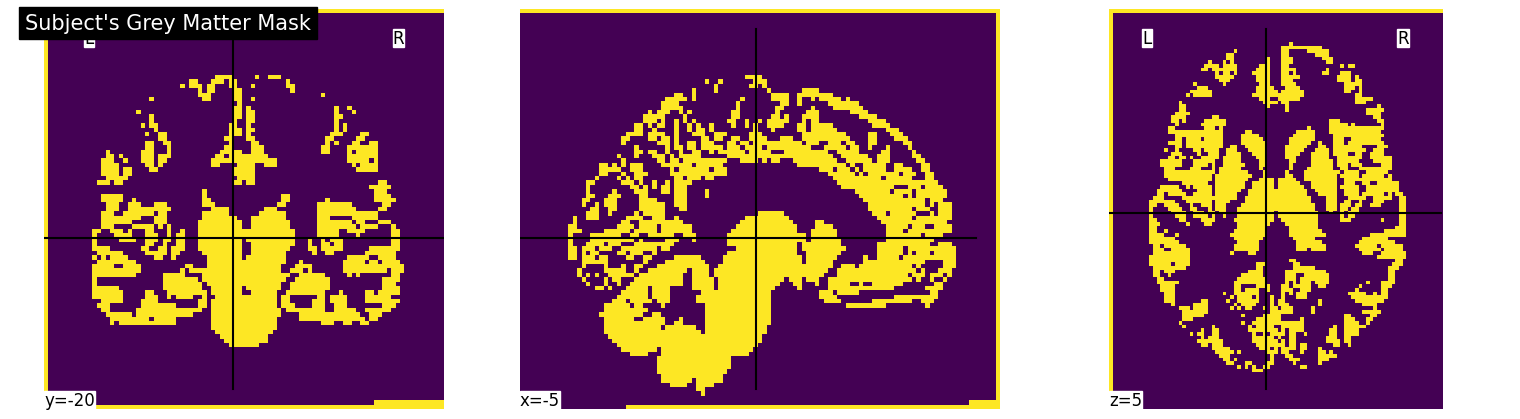

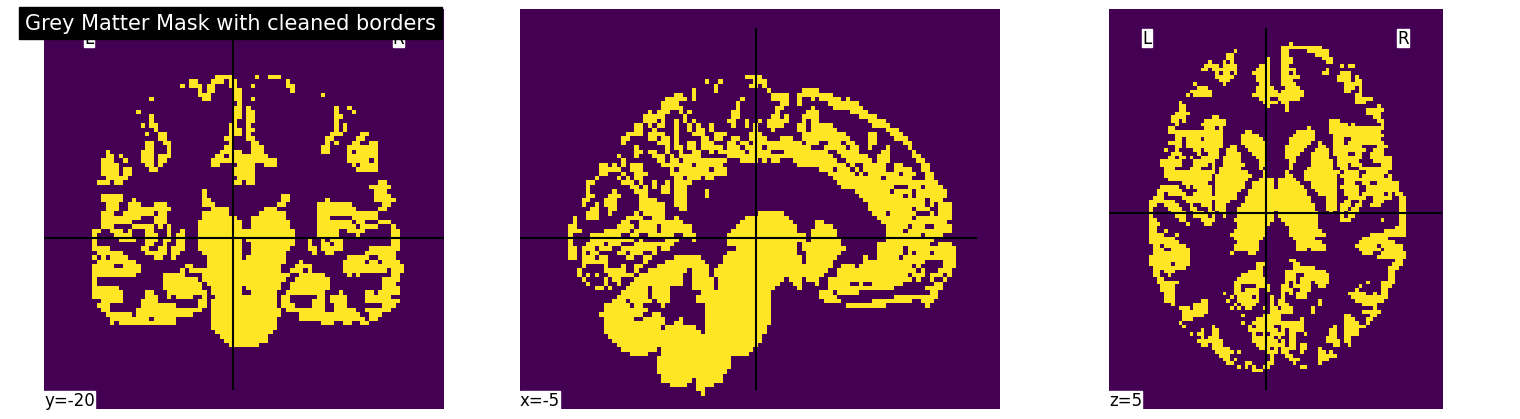

/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/anat/113619_gm_mask.nii.gz


In [108]:
process_gray_matter_mask(anat_dir, subject, border_size=2, save=True)

In [177]:
def create_4d_volume(subject, task, acquisition, smoothing=5, save=False):
    concat_4d_vols_file = subject_task_concat_volumes_path(subject, task, acquisition, smoothing)
    print(concat_4d_vols_file)
    if os.path.isfile(concat_4d_vols_file):
        print(f"files {os.path.basename(concat_4d_vols_file)} already exists, skipping processing")
        return nib.load(concat_4d_vols_file)
    
    nii_directory = os.path.join(fMRI_dir, subject, f"tfMRI_{task}_RL/fMRIvols_GLMyes/")
    nii_files = sorted(glob.glob(nii_directory + '*.nii'))
    pretty_print(nii_files, n_toprint=2)
    
    first_img = nib.load(nii_files[0])
    data = first_img.get_fdata()  # 3D data from the first file
    data_4d = np.zeros((data.shape[0], data.shape[1], data.shape[2], len(nii_files)))

    for i, nii_file in enumerate(nii_files):
        img = nib.load(nii_file)
        img = image.smooth_img(img, smoothing)
        data_4d[..., i] = img.get_fdata()

    # Create a new NIfTI image
    concat_img = nib.Nifti1Image(data_4d, affine=first_img.affine, header=first_img.header)
    
    if save:
        nib.save(concat_img, concat_4d_vols_file)
        
    return concat_4d_vols_file

In [159]:
create_4d_volume(subject, tasktype, acquisition, smoothing=5, save=True)

/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/func/113619_MOTOR_RL_smooth-5mm_fMRIvols.nii.gz
files 113619_MOTOR_RL_smooth-5mm_fMRIvols.nii.gz already exists, skipping processing


In [191]:
def create_events_df(subject, task, acquisition, plot_regressors=False):
    filepath = pjoin(paradigm_dir, f"{subject}_Regressor_tfMRI_{task}_{acquisition}.mat")
    print(filepath)
    data = scipy.io.loadmat(filepath)

    regressor = data['Regressor']

    # Flatten the regressor to 1D if necessary
    regressor_flat = regressor.flatten()
    if plot_regressors:
        plt.plot(regressor_flat)
    
    # Initialize lists to store onset, duration, and condition (trial type)
    onsets, durations, trial_types = [], [], []

    # Identify events by iterating through the regressor
    current_condition = regressor_flat[0]
    start_time = 0  # Initial start time
    
    for i, condition in enumerate(regressor_flat[1:], start=1):
        if condition == current_condition: 
            continue

        # Append the onset, duration, and trial type of the previous condition
        onsets.append(start_time * TR)
        durations.append((i - start_time) * TR)
        trial_types.append(f'condition_{current_condition}')

        # Update for the new condition
        current_condition = condition
        start_time = i

    # Add the last event
    onsets.append(start_time * TR)
    durations.append((len(regressor_flat) - start_time) * TR)
    trial_types.append(f'condition_{current_condition}')

    # Create the event file as a DataFrame
    events = pd.DataFrame({
        'onset': onsets,
        'duration': durations,
        'trial_type': trial_types
    })

    #Remove condition 0 which is a the no-paradigm condition and reset indexes
    events = events[events['trial_type'] != "condition_0"]
    events = events.reset_index(drop=True)
    
    condition_counts = events['trial_type'].value_counts().to_dict()
    independent_events = copy.deepcopy(events)
    # Modify the trial_type to include the index of each event occurrence
    independent_events['trial_type'] = [f"{row['trial_type']}_{i}" for i, row in events.iterrows()]
    
    return independent_events

/media/miplab-nas2/HCP-Data/HCP_100unrelated_TaskParadigms/113619_Regressor_tfMRI_WM_RL.mat


,onset,duration,trial_type
0,7.92,27.36,condition_5_0
1,36.00,27.36,condition_2_1
2,79.20,27.36,condition_8_2
3,107.28,27.36,condition_1_3
4,150.48,27.36,condition_3_4
5,179.28,27.36,condition_6_5
6,222.48,27.36,condition_4_6
7,250.56,27.36,condition_7_7


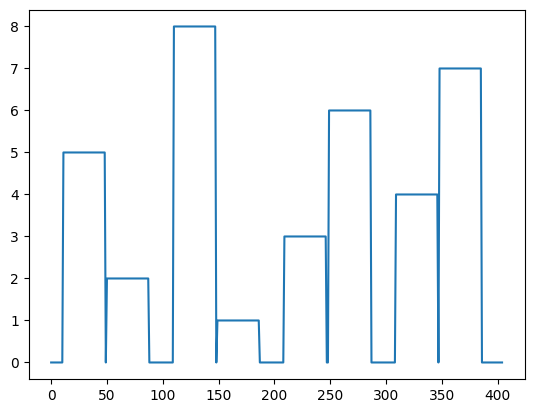

In [200]:
create_events_df(subject, "WM", acquisition, plot_regressors=True)

In [161]:
create_events_df(subject, tasktype, acquisition, plot_regressors=False)

,onset,duration,trial_type
0,10.80,11.52,condition_4_0
1,25.92,11.52,condition_2_1
2,56.16,11.52,condition_5_2
3,71.28,11.52,condition_1_3
4,86.40,11.52,condition_3_4
5,115.92,11.52,condition_4_5
6,131.04,11.52,condition_5_6
7,146.88,11.52,condition_2_7
8,162.00,11.52,condition_3_8
9,177.12,11.52,condition_1_9


In [208]:
def plot_fmap(fmap, threshold, display_mode, task=""):
    plotting.plot_stat_map(
        fmap,
        threshold=threshold,
        title=f"{task} F-statistic Map, abs(threshold) > {threshold}",
        figure=plt.figure(figsize=(15, 2)),
        display_mode=display_mode,
        cut_coords=7,
        black_bg=True,
        colorbar=False
    )

In [173]:
def compute_task_fmap(subject, task, acquisition, smoothing, fmri_glm, contrast_matrix, save=False):
    fmap_path = subject_task_fmap(subject, task, acquisition, smoothing)
    if os.path.isfile(fmap_path):
        return nib.load(fmap_path)

    f_test_result = fmri_glm.compute_contrast(contrast_matrix, stat_type='F')
    if save:
        f_test_result.to_filename(fmap_path)
    
    return f_test_result

In [198]:
def show_task_activation(subject, task, acquisition, smoothing=5, plot_designmatrix=False, cluster_size=None, fdr_rate=0.01, threshold=2):
    print("processing subject gray matter mask")
    gm_mask = subject_gm_mask_path(subject)
    
    print(f"concatenating volumes for task {task}")
    fmri_vols = create_4d_volume(subject, task, acquisition, smoothing, save=True)
    
    print("processing event conditions")
    independent_events = create_events_df(subject, task, acquisition)
    
    fmri_glm = FirstLevelModel(
        mask_img=gm_mask,
        t_r=TR,
        noise_model='ar1', # or ols 
        standardize=False,
        hrf_model='spm',
        drift_model=None, # not necessary, nuisance covariates have already been removed
    )

    # Fit the model to our design and data
    print(f"fitting GLM for task {task}")
    fmri_glm = fmri_glm.fit(fmri_vols, independent_events)
    
    design_matrix = fmri_glm.design_matrices_[0]
    if plot_designmatrix:
        plot_design_matrix(design_matrix)

    n_regressors = design_matrix.shape[1] #non usato per ora

    contrast_matrix = np.diag(np.ones(n_regressors)) 
    contrast_matrix[n_regressors-1, n_regressors-1] = 0 

    contrast_matrix = np.zeros((n_regressors-1, n_regressors))
    np.fill_diagonal(contrast_matrix, 1)  # Identity matrix for joint F-test
    
    print("computing fmap")
    fmap = compute_task_fmap(subject, task, acquisition, smoothing, fmri_glm, contrast_matrix, save=True)
    if cluster_size is not None:
        fmap, threshold = threshold_stats_img(fmap, alpha=fdr_rate, cluster_threshold=cluster_size)
        
    plot_fmap(fmap, threshold, "z", task=task)
    plot_fmap(fmap, threshold, "x", task=task)
    plot_fmap(fmap, threshold, "y", task=task)
    plt.show()

processing subject gray matter mask
concatenating volumes for task MOTOR
/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/func/113619_MOTOR_RL_smooth-5mm_fMRIvols.nii.gz
files 113619_MOTOR_RL_smooth-5mm_fMRIvols.nii.gz already exists, skipping processing
processing event conditions
/media/miplab-nas2/HCP-Data/HCP_100unrelated_TaskParadigms/113619_Regressor_tfMRI_MOTOR_RL.mat
fitting GLM for task MOTOR
computing fmap


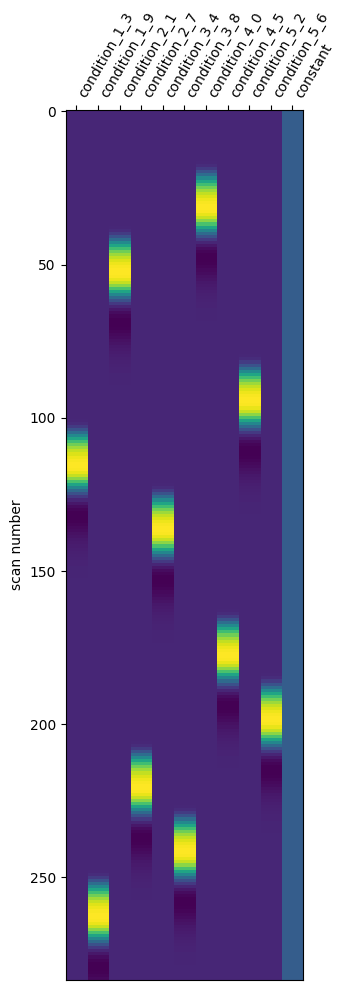

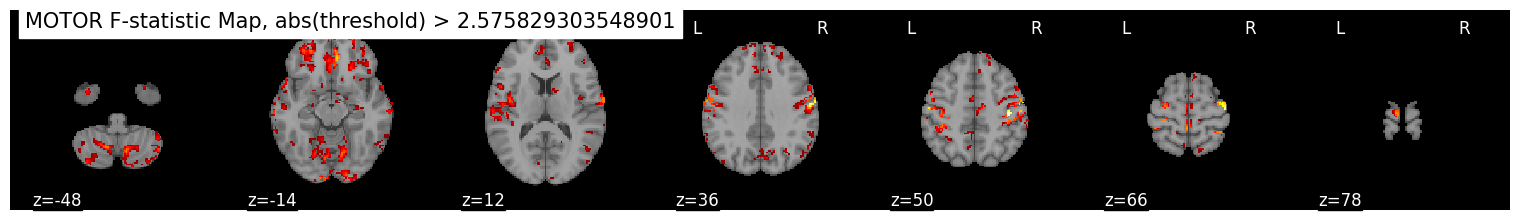

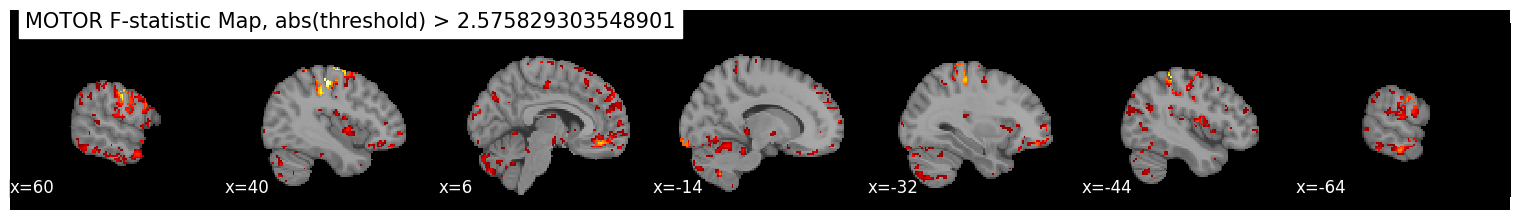

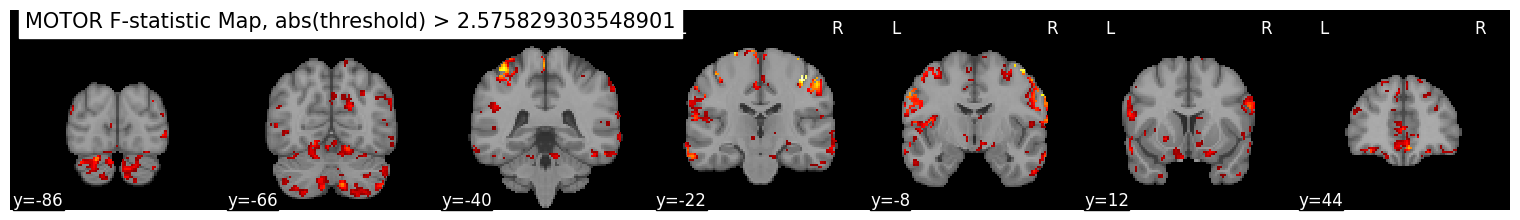

In [210]:
show_task_activation(subject, "MOTOR", acquisition, smoothing=5, plot_designmatrix=True, cluster_size=10)

processing subject gray matter mask
concatenating volumes for task GAMBLING
/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/func/113619_GAMBLING_RL_smooth-5mm_fMRIvols.nii.gz
files 113619_GAMBLING_RL_smooth-5mm_fMRIvols.nii.gz already exists, skipping processing
processing event conditions
/media/miplab-nas2/HCP-Data/HCP_100unrelated_TaskParadigms/113619_Regressor_tfMRI_GAMBLING_RL.mat
fitting GLM for task GAMBLING
computing fmap


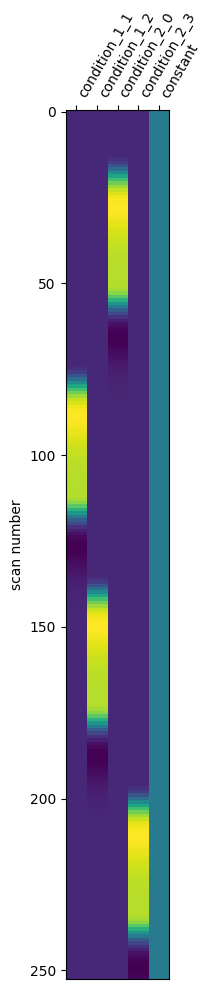

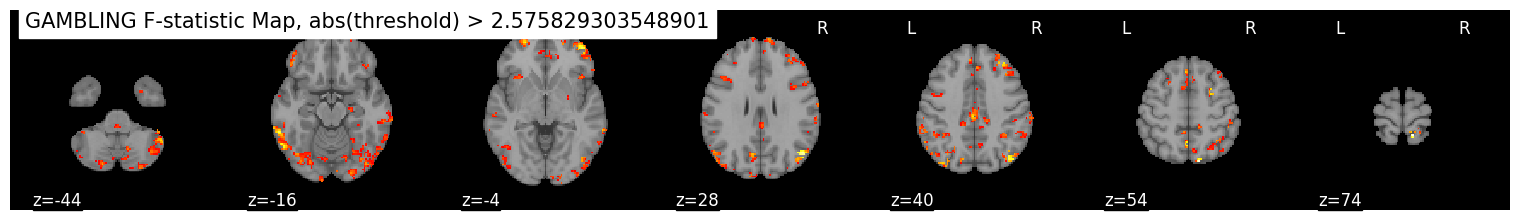

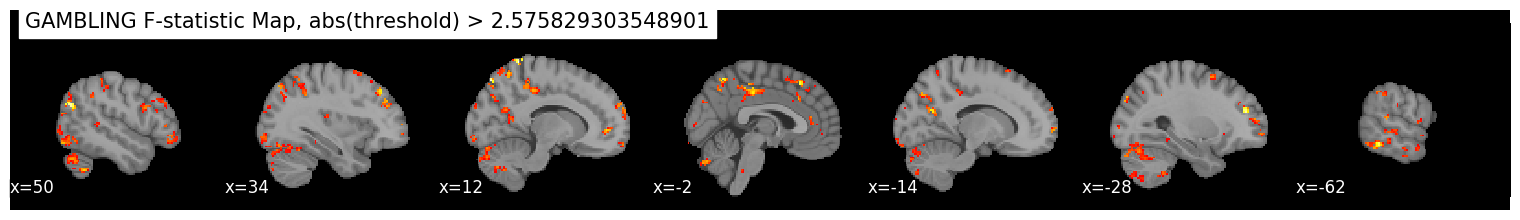

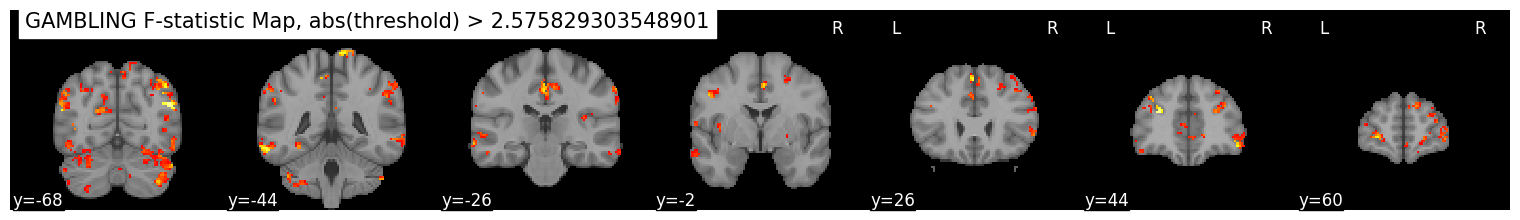

In [211]:
show_task_activation(subject, "GAMBLING", acquisition, smoothing=5, plot_designmatrix=True, cluster_size=10)

processing subject gray matter mask
concatenating volumes for task WM
/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/func/113619_WM_RL_smooth-5mm_fMRIvols.nii.gz
files 113619_WM_RL_smooth-5mm_fMRIvols.nii.gz already exists, skipping processing
processing event conditions
/media/miplab-nas2/HCP-Data/HCP_100unrelated_TaskParadigms/113619_Regressor_tfMRI_WM_RL.mat
fitting GLM for task WM
computing fmap


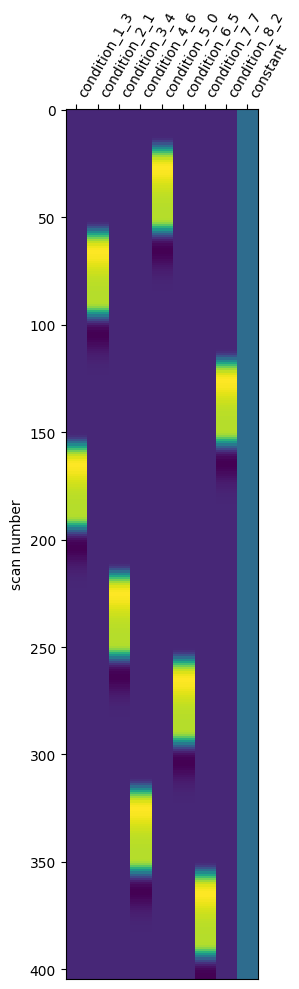

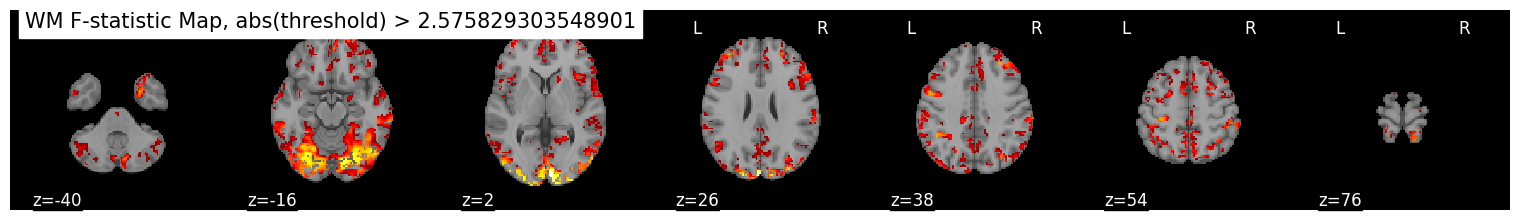

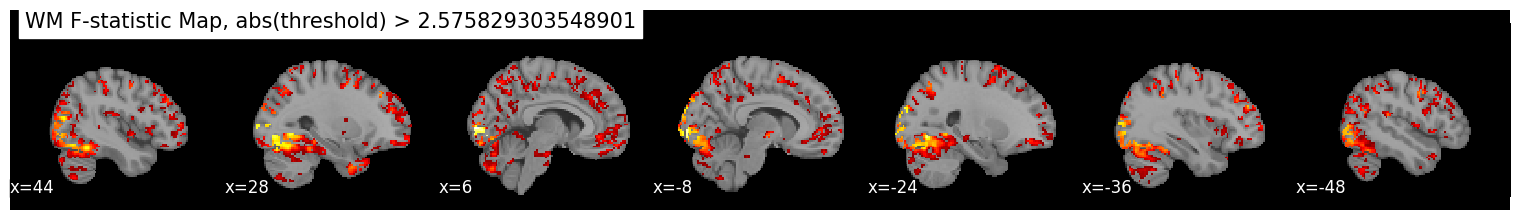

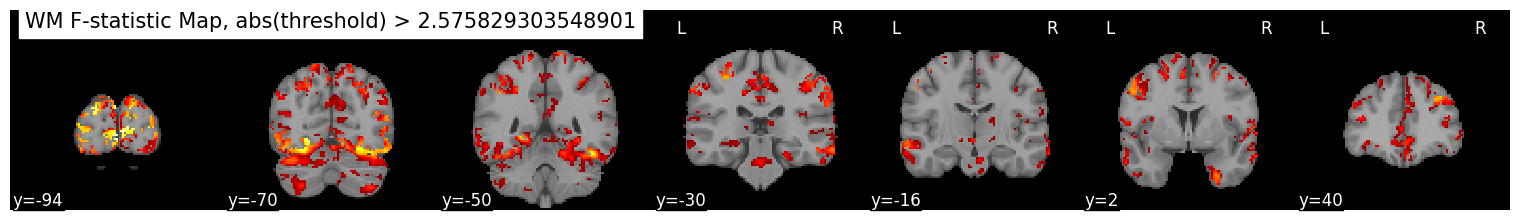

In [209]:
show_task_activation(subject, "WM", acquisition, smoothing=5, plot_designmatrix=True, cluster_size=10)

processing subject gray matter mask
concatenating volumes for task EMOTION
/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/func/113619_EMOTION_RL_smooth-5mm_fMRIvols.nii.gz
files 113619_EMOTION_RL_smooth-5mm_fMRIvols.nii.gz already exists, skipping processing
processing event conditions
/media/miplab-nas2/HCP-Data/HCP_100unrelated_TaskParadigms/113619_Regressor_tfMRI_EMOTION_RL.mat
fitting GLM for task EMOTION
computing fmap


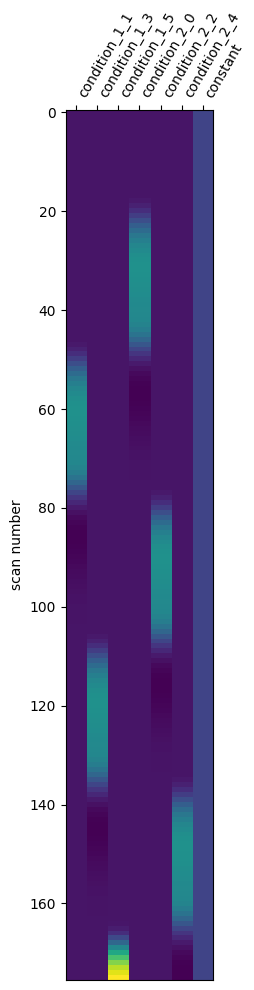

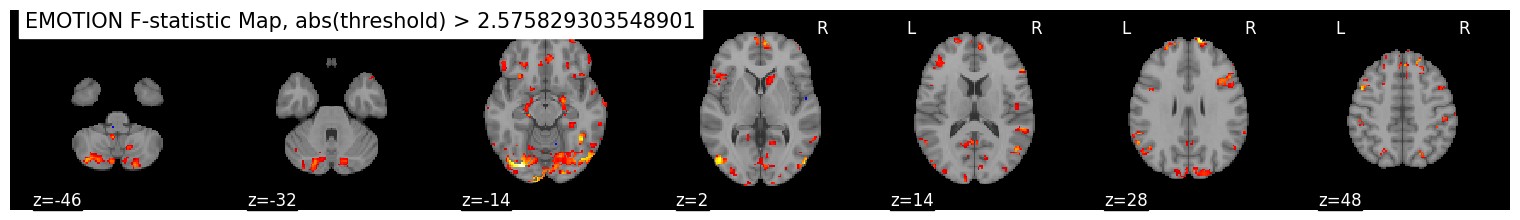

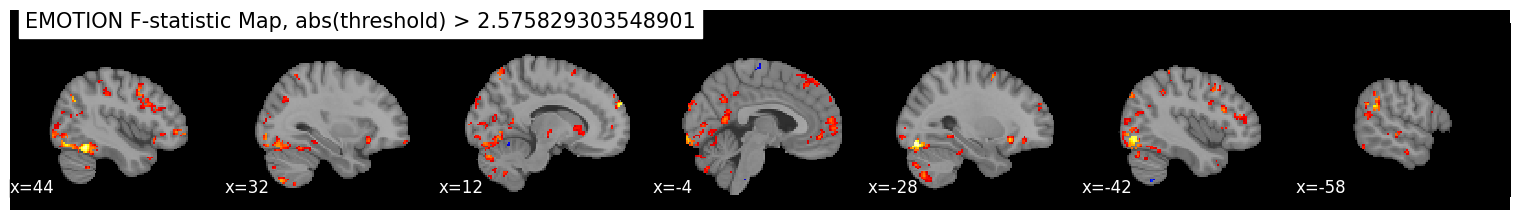

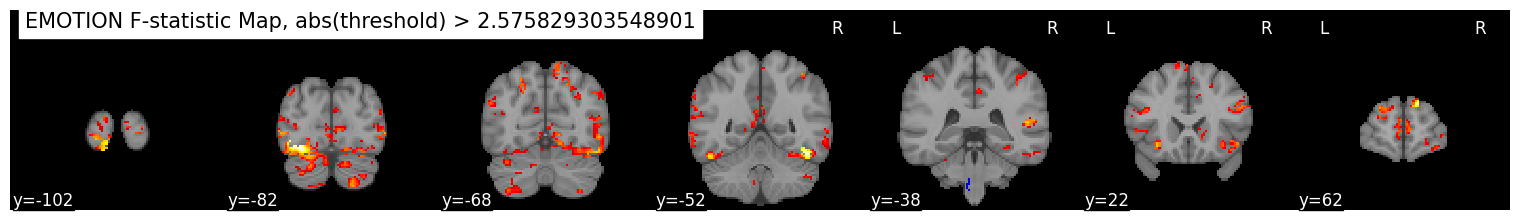

In [212]:
show_task_activation(subject, "EMOTION", acquisition, smoothing=5, plot_designmatrix=True, cluster_size=10)

processing subject gray matter mask
concatenating volumes for task LANGUAGE
/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/func/113619_LANGUAGE_RL_smooth-5mm_fMRIvols.nii.gz
files 113619_LANGUAGE_RL_smooth-5mm_fMRIvols.nii.gz already exists, skipping processing
processing event conditions
/media/miplab-nas2/HCP-Data/HCP_100unrelated_TaskParadigms/113619_Regressor_tfMRI_LANGUAGE_RL.mat
fitting GLM for task LANGUAGE
computing fmap


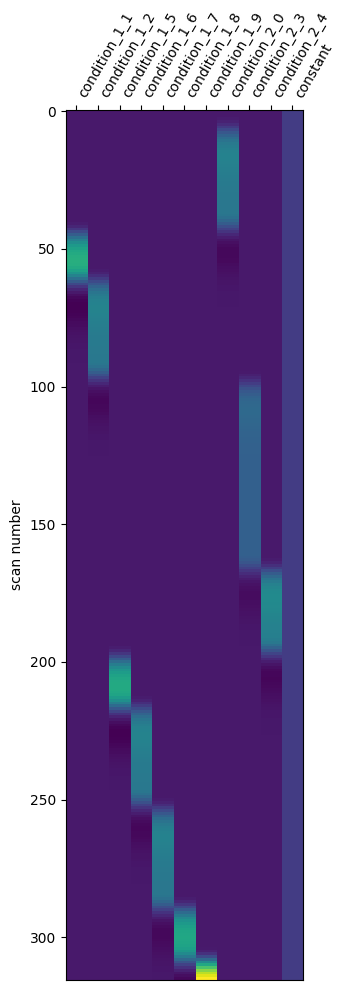

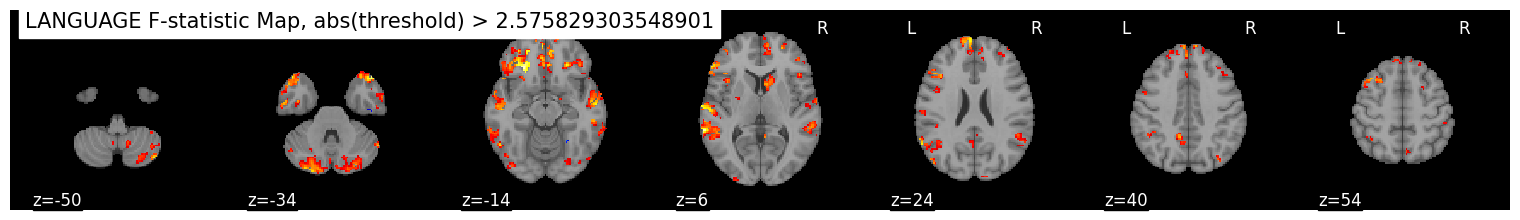

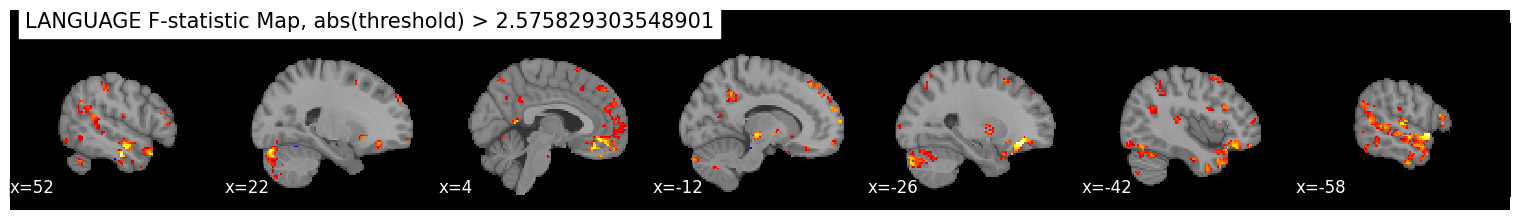

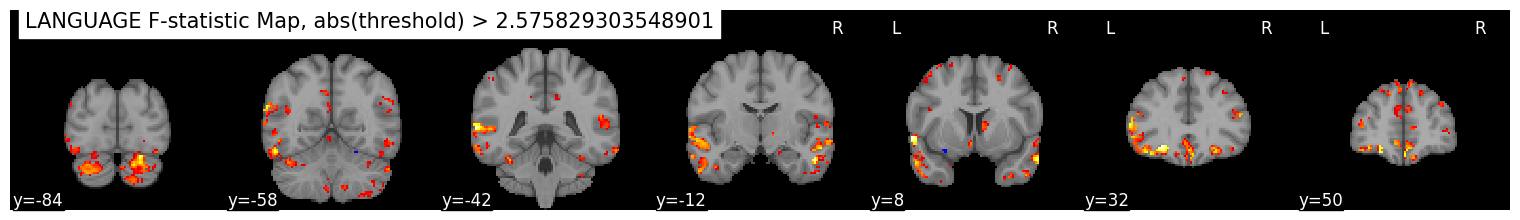

processing subject gray matter mask
concatenating volumes for task RELATIONAL
/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/func/113619_RELATIONAL_RL_smooth-5mm_fMRIvols.nii.gz
files 113619_RELATIONAL_RL_smooth-5mm_fMRIvols.nii.gz already exists, skipping processing
processing event conditions
/media/miplab-nas2/HCP-Data/HCP_100unrelated_TaskParadigms/113619_Regressor_tfMRI_RELATIONAL_RL.mat
fitting GLM for task RELATIONAL
computing fmap


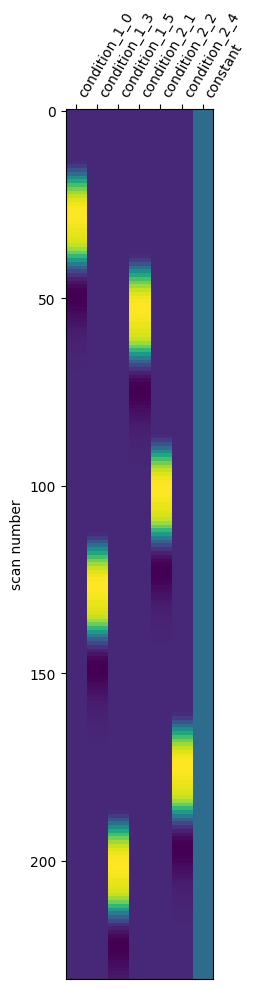

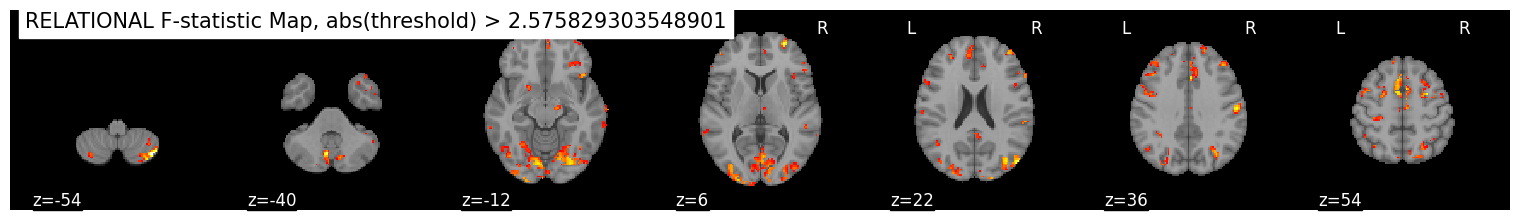

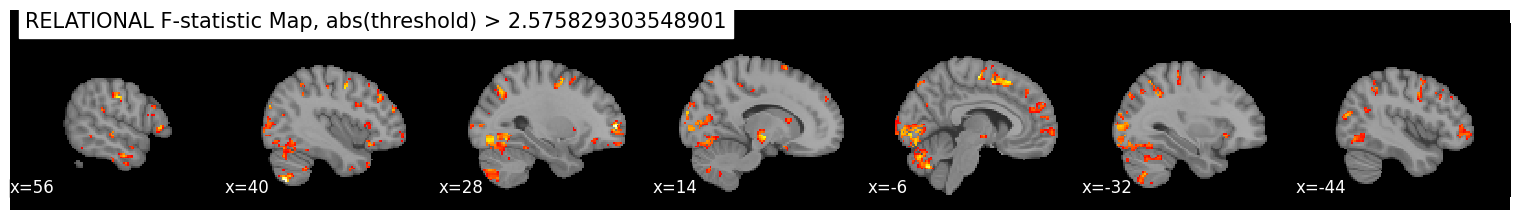

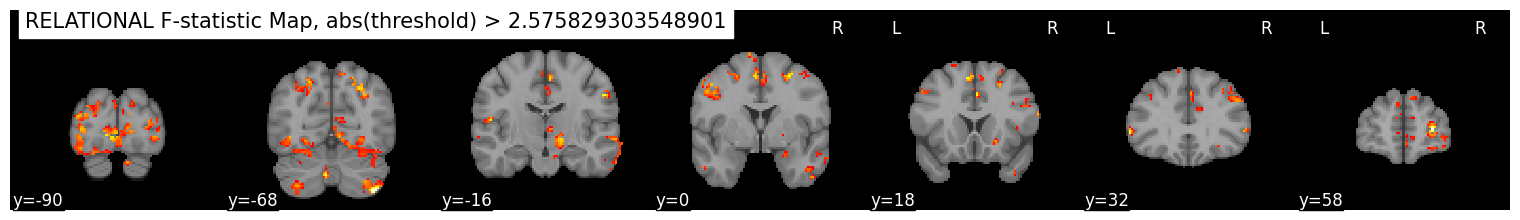

processing subject gray matter mask
concatenating volumes for task SOCIAL
/media/RCPNAS/Data2/CS-433-ML4S/data/derivatives/func/113619_SOCIAL_RL_smooth-5mm_fMRIvols.nii.gz
files 113619_SOCIAL_RL_smooth-5mm_fMRIvols.nii.gz already exists, skipping processing
processing event conditions
/media/miplab-nas2/HCP-Data/HCP_100unrelated_TaskParadigms/113619_Regressor_tfMRI_SOCIAL_RL.mat
fitting GLM for task SOCIAL
computing fmap


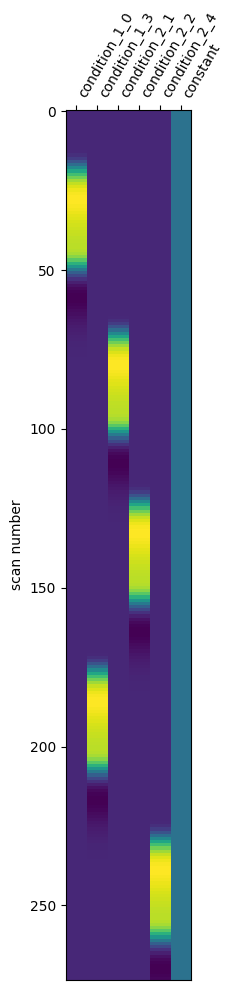

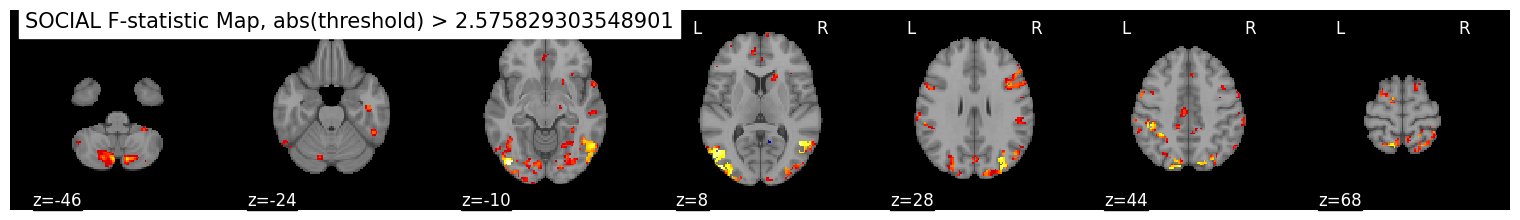

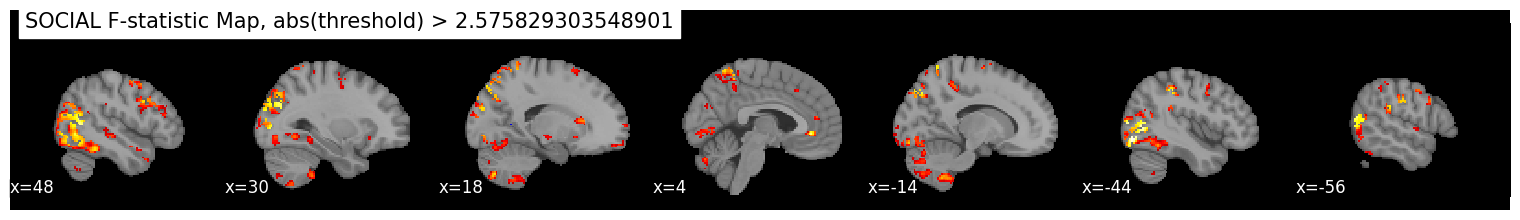

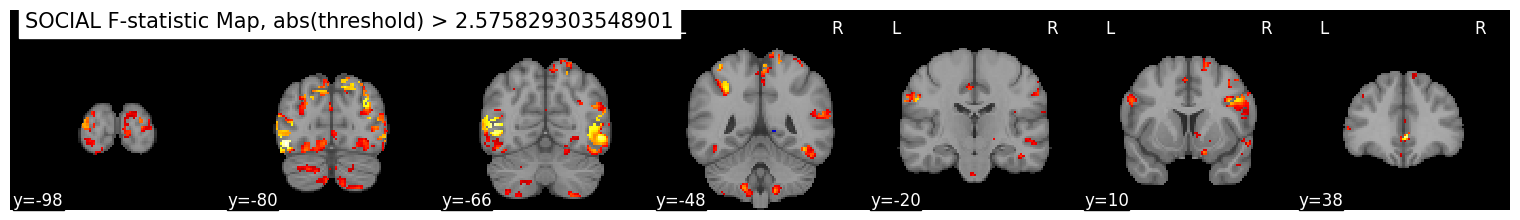

In [213]:
show_task_activation(subject, "LANGUAGE", acquisition, smoothing=5, plot_designmatrix=True, cluster_size=10)
show_task_activation(subject, "RELATIONAL", acquisition, smoothing=5, plot_designmatrix=True, cluster_size=10)
show_task_activation(subject, "SOCIAL", acquisition, smoothing=5, plot_designmatrix=True, cluster_size=10)